# PyTorch Workflow

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'2.9.0+cpu'

## 1. Data (preparing and loading)

Data can be almost anything...in machine learning

* Excel speadsheet
* Images of any kind
* Videos
* Audio

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some know data using the linear regression formula.

We'll use a linear regression formula to make a straight line with know **parameters**


In [ ]:
# Creater *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

#### Splitting data into training and tests sets

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test),len(X_test), len(y_test)


(40, 10, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4,label="Testing Data")

  if predictions is not None:
    # Plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r",s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14});



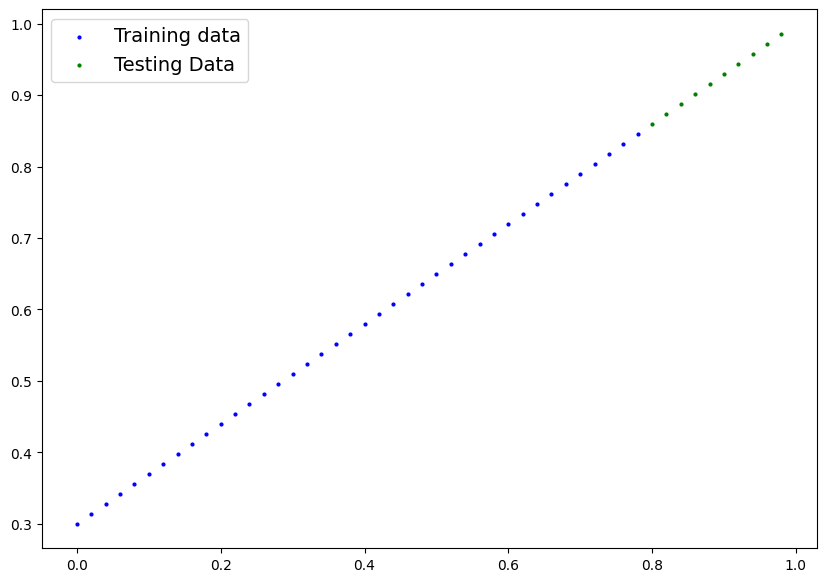

In [ ]:
plot_predictions();

## 2. Build a model

In [ ]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### Cheking the contents of our models

So we can check our model paramters or what's inside our model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance  of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

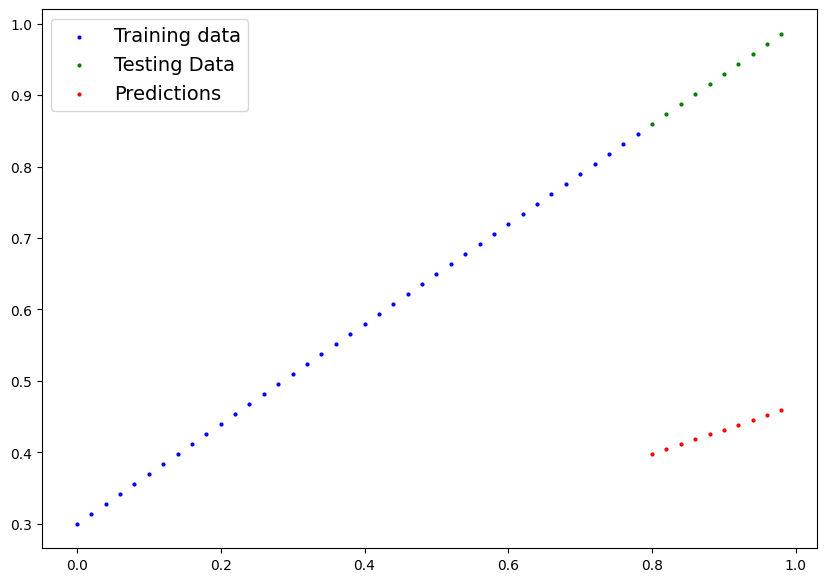

In [ ]:
plot_predictions(predictions=y_preds)

### 3. Train model

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fun = nn.L1Loss()

# Setup an Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

In [ ]:
torch.manual_seed(42)

epoch_count = []
loss_values = []
test_loss_values = []
epochs = 1000

for epoch in range(epochs):
  # Set the model to trainingmodel
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2.Calculate the loss
  loss = loss_fun(y_pred, y_train)

  # 3. Optimize zero_grad()
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descend)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
      test_pred = model_0(X_test)
      test_loss = loss_fun(test_pred, y_test)



  if epoch % 100 == 0:
    loss_values.append(loss)
    epoch_count.append(epoch)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Training Loss: {loss} | Testing Loss: {test_loss}")



Epoch: 0 | Training Loss: 0.31288138031959534 | Testing Loss: 0.4931890368461609
Epoch: 100 | Training Loss: 0.19767141342163086 | Testing Loss: 0.35847947001457214
Epoch: 200 | Training Loss: 0.08973254263401031 | Testing Loss: 0.22795839607715607
Epoch: 300 | Training Loss: 0.05357731133699417 | Testing Loss: 0.15086300671100616
Epoch: 400 | Training Loss: 0.04549176245927811 | Testing Loss: 0.11657620966434479
Epoch: 500 | Training Loss: 0.04160415381193161 | Testing Loss: 0.10088418424129486
Epoch: 600 | Training Loss: 0.03811401128768921 | Testing Loss: 0.08986451476812363
Epoch: 700 | Training Loss: 0.03466346859931946 | Testing Loss: 0.08097299933433533
Epoch: 800 | Training Loss: 0.03122851625084877 | Testing Loss: 0.07297395914793015
Epoch: 900 | Training Loss: 0.027794325724244118 | Testing Loss: 0.06490625441074371


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

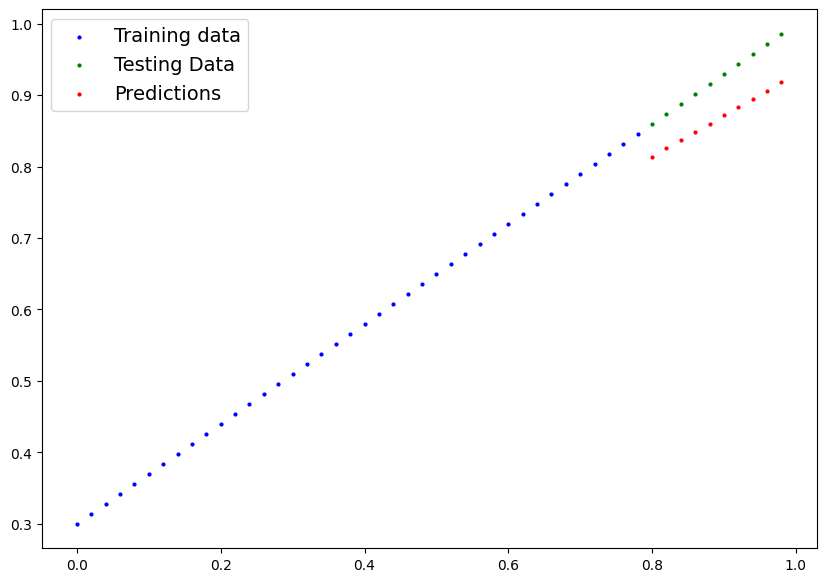

In [ ]:
plot_predictions(predictions=y_pred_new)

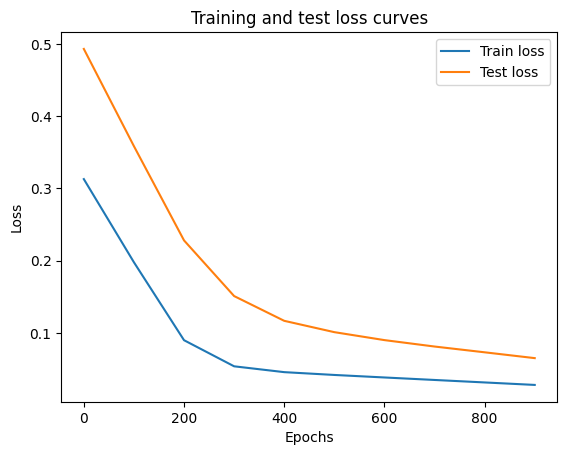

In [ ]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a model in PyTorch

There are three main methods you should know about for saving and load models in PyTorch

1. `torch.save()`
2.  `torch.load()`
3. `torch.nn.Module.load_state_dict()`

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## Loading a Pytorch Model

since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the `state_dict()` into that

In [ ]:
# Create a new instance of our model
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [ ]:
# Make some predictions with our model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8140],
        [0.8255],
        [0.8371],
        [0.8487],
        [0.8603],
        [0.8718],
        [0.8834],
        [0.8950],
        [0.9066],
        [0.9181]])

In [ ]:
# Make some predictions with our model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8140],
        [0.8255],
        [0.8371],
        [0.8487],
        [0.8603],
        [0.8718],
        [0.8834],
        [0.8950],
        [0.9066],
        [0.9181]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

In [ ]:
# Import PyTirch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt


# Check PyTorch
torch.__version__

'2.9.0+cpu'

Create device-agnostic code.
This means if we'he got access to GPU, our code will use it
if no GPU is available, the code will default to using CPU

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create rnage values
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

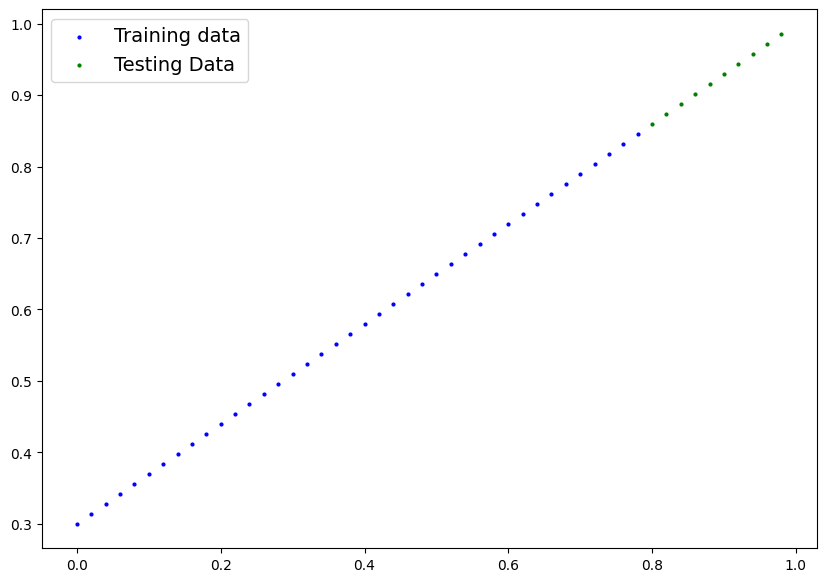

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

### Building a PyTorch Linear Model

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
#Checkt hte model current device
next(model_1.parameters()).device

device(type='cpu')

### Training

In [ ]:
# Setup the loss fuction
loss_fun = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200
# Put data on target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):

  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fun(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fun(test_pred, y_test)

  # Print out what happening
  if epoch % 10 == 0:
    print(f"Epochs: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epochs: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epochs: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epochs: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epochs: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epochs: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epochs: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epochs: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epochs: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epochs: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epochs: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epochs: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epochs: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epochs: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epochs: 130 | Loss: 0.0012645035749301314 | Test loss: 0.

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

with torch.inference_mode():
  y_pred_1 = model_1(X_test)
y_pred_1

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

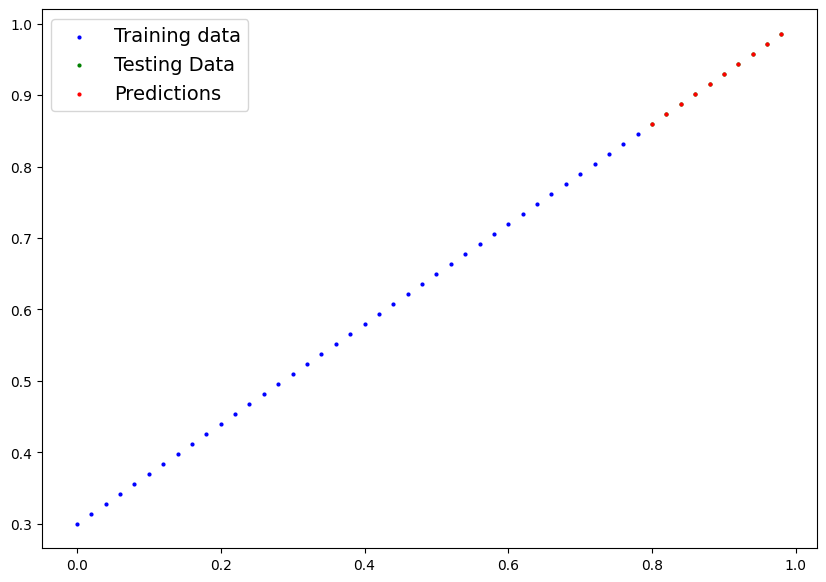

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test, torch.Tensor(y_pred_1).numpy())

### Saving / Load Model

In [ ]:
from pathlib import Path

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_PATH = Path("models")

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


In [ ]:
model_1_new = LinearRegressionModelV2()

In [ ]:
model_1_new.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
model_1_new.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

## Exercice

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.manual_seed(42)

weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

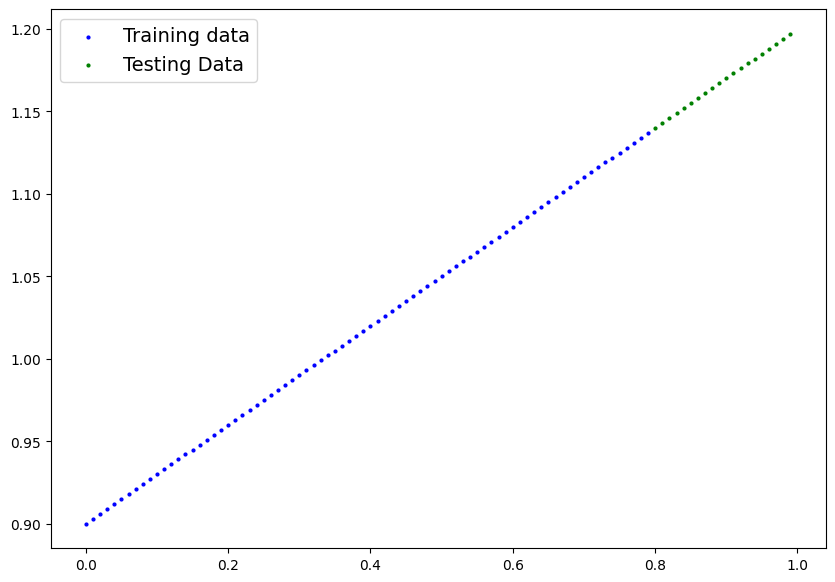

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test,None)

In [ ]:
class CustomLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=float))
    self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [ ]:
custom_model = CustomLinearRegressionModel()
custom_model.state_dict()

OrderedDict([('weight', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=custom_model.parameters(), lr=0.01)

In [ ]:
epochs = 300
for epoch in range(epochs):

  ### Training
  custom_model.train()

  # 1. forward pass
  y_pred = custom_model(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. backpropagation
  loss.backward()

  # 5. Step
  optimizer.step()

  if epoch % 20 == 0:
    ### Testing
    custom_model.eval()
    test_pred = custom_model(X_test)
    test_loss = loss_fn(test_pred, y_test)
    print(f"Epoch: {epoch} | loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | loss: 0.7566978850205477 | Test Loss: 0.7248174654184888
Epoch: 20 | loss: 0.5254928853781197 | Test Loss: 0.4541124656823234
Epoch: 40 | loss: 0.29428788573569165 | Test Loss: 0.18340746594615806
Epoch: 60 | loss: 0.07658555325353075 | Test Loss: 0.07274122116104585
Epoch: 80 | loss: 0.052553712033635194 | Test Loss: 0.11581578331597756
Epoch: 100 | loss: 0.0455426820761507 | Test Loss: 0.10467905803297743
Epoch: 120 | loss: 0.03868856948548406 | Test Loss: 0.08938330773272553
Epoch: 140 | loss: 0.03183445689481727 | Test Loss: 0.0740875574324729
Epoch: 160 | loss: 0.024982301802456926 | Test Loss: 0.05810385712437619
Epoch: 180 | loss: 0.018130146710096596 | Test Loss: 0.042120156816279494
Epoch: 200 | loss: 0.011278970366889483 | Test Loss: 0.0257924815042608
Epoch: 220 | loss: 0.004429369271340572 | Test Loss: 0.009467043690112609
Epoch: 240 | loss: 0.0037011259984489216 | Test Loss: 0.006490206455296588
Epoch: 260 | loss: 0.0037011259984489216 | Test Loss: 0.00649020645

In [ ]:
with torch.inference_mode():
  preds = custom_model(X_test)
preds

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], dtype=torch.float64)

In [ ]:
y_test

tensor([[1.1400],
        [1.1430],
        [1.1460],
        [1.1490],
        [1.1520],
        [1.1550],
        [1.1580],
        [1.1610],
        [1.1640],
        [1.1670],
        [1.1700],
        [1.1730],
        [1.1760],
        [1.1790],
        [1.1820],
        [1.1850],
        [1.1880],
        [1.1910],
        [1.1940],
        [1.1970]])

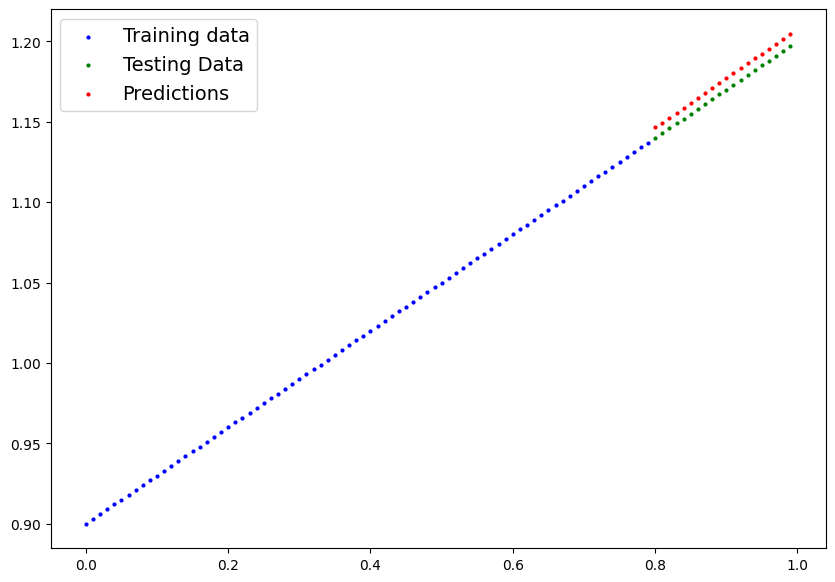

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test, preds)

In [ ]:
from pathlib import Path

MODEL_NAME = "01_exercice_model.pth"
MODEL_PATH = Path("models")
Path.mkdir(MODEL_PATH, exist_ok=True)
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving {MODEL_NAME} to {MODEL_SAVE_PATH}")
torch.save(obj=custom_model.state_dict(), f=MODEL_SAVE_PATH)

Saving 01_exercice_model.pth to models/01_exercice_model.pth


In [ ]:
new_model = CustomLinearRegressionModel()
new_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
new_model.state_dict()

OrderedDict([('weight', tensor([0.3067], dtype=torch.float64)),
             ('bias', tensor([0.9011], dtype=torch.float64))])